Video Game Sales Analysis ---

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# cleaning the data
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
# remove the missing valus
df.dropna(inplace = True)

In [10]:
#check for missing values removed
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
# checking the duplicated values
df.duplicated().sum()

0

In [12]:
# Data Exploration

In [13]:
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [14]:
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5087,5089,Alien: Isolation,PS3,2014.0,Shooter,Sega,0.12,0.19,0.00,0.07,0.37
2150,2152,Jampack Summer '99,PS,1999.0,Misc,Sony Computer Entertainment,0.54,0.36,0.00,0.06,0.96
1655,1657,Sly Cooper and the Thievius Raccoonus,PS2,2002.0,Platform,Sony Computer Entertainment,1.03,0.14,0.00,0.04,1.21
2599,2601,Rayman Origins,X360,2011.0,Platform,Ubisoft,0.38,0.34,0.00,0.08,0.79
684,686,Grand Theft Auto,PS,1997.0,Action,Take-Two Interactive,0.79,1.35,0.04,0.14,2.32
11178,11180,Escape Dead Island,X360,2014.0,Action,Deep Silver,0.03,0.05,0.00,0.01,0.09
1736,1738,Mirror's Edge,X360,2008.0,Platform,Electronic Arts,0.51,0.51,0.01,0.13,1.17
8903,8905,The Wizard of Oz: Beyond The Yellow Brick Road,DS,2008.0,Role-Playing,D3Publisher,0.13,0.00,0.00,0.01,0.15
14867,14870,Diabolik Lovers: Lunatic Parade,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
12550,12552,Zoo Tycoon 2,PC,2004.0,Strategy,Microsoft Game Studios,0.00,0.05,0.00,0.01,0.06


In [15]:
df.shape

(16291, 11)

In [16]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

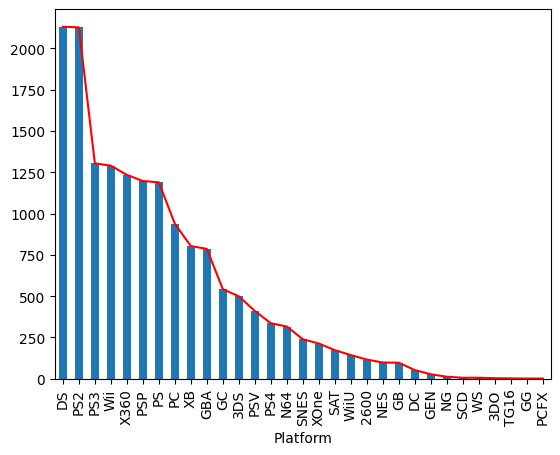

In [20]:
df["Platform"].value_counts().plot(kind = "bar")
plt.plot(df["Platform"].value_counts(), color = "red")


<Axes: xlabel='Publisher'>

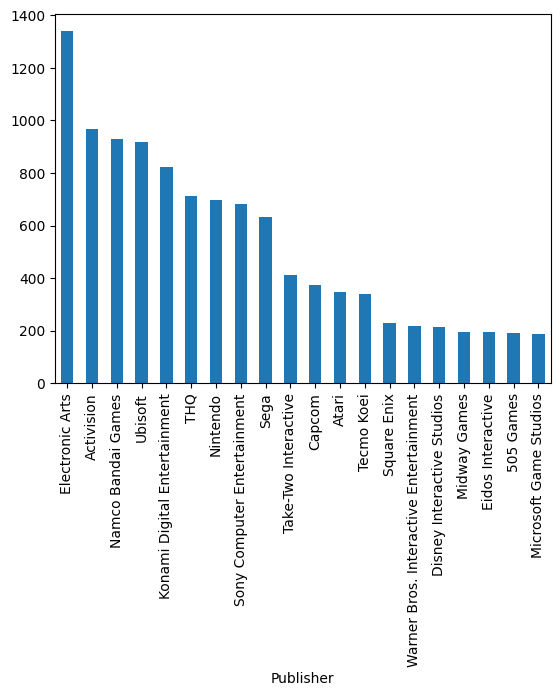

In [21]:
df["Publisher"].value_counts().head(20).plot(kind = "bar")

Text(0.5, 1.0, 'Global Sales by Sales')

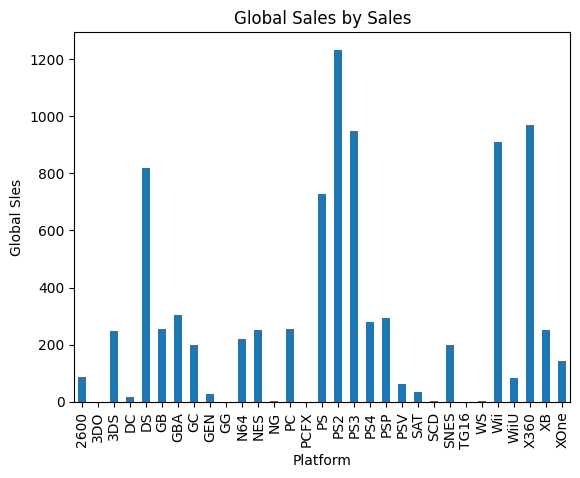

In [23]:
df["Global_Sales"].groupby(df["Platform"]).sum().plot(kind = "bar")
plt.ylabel("Global Sles")
plt.title("Global Sales by Sales")

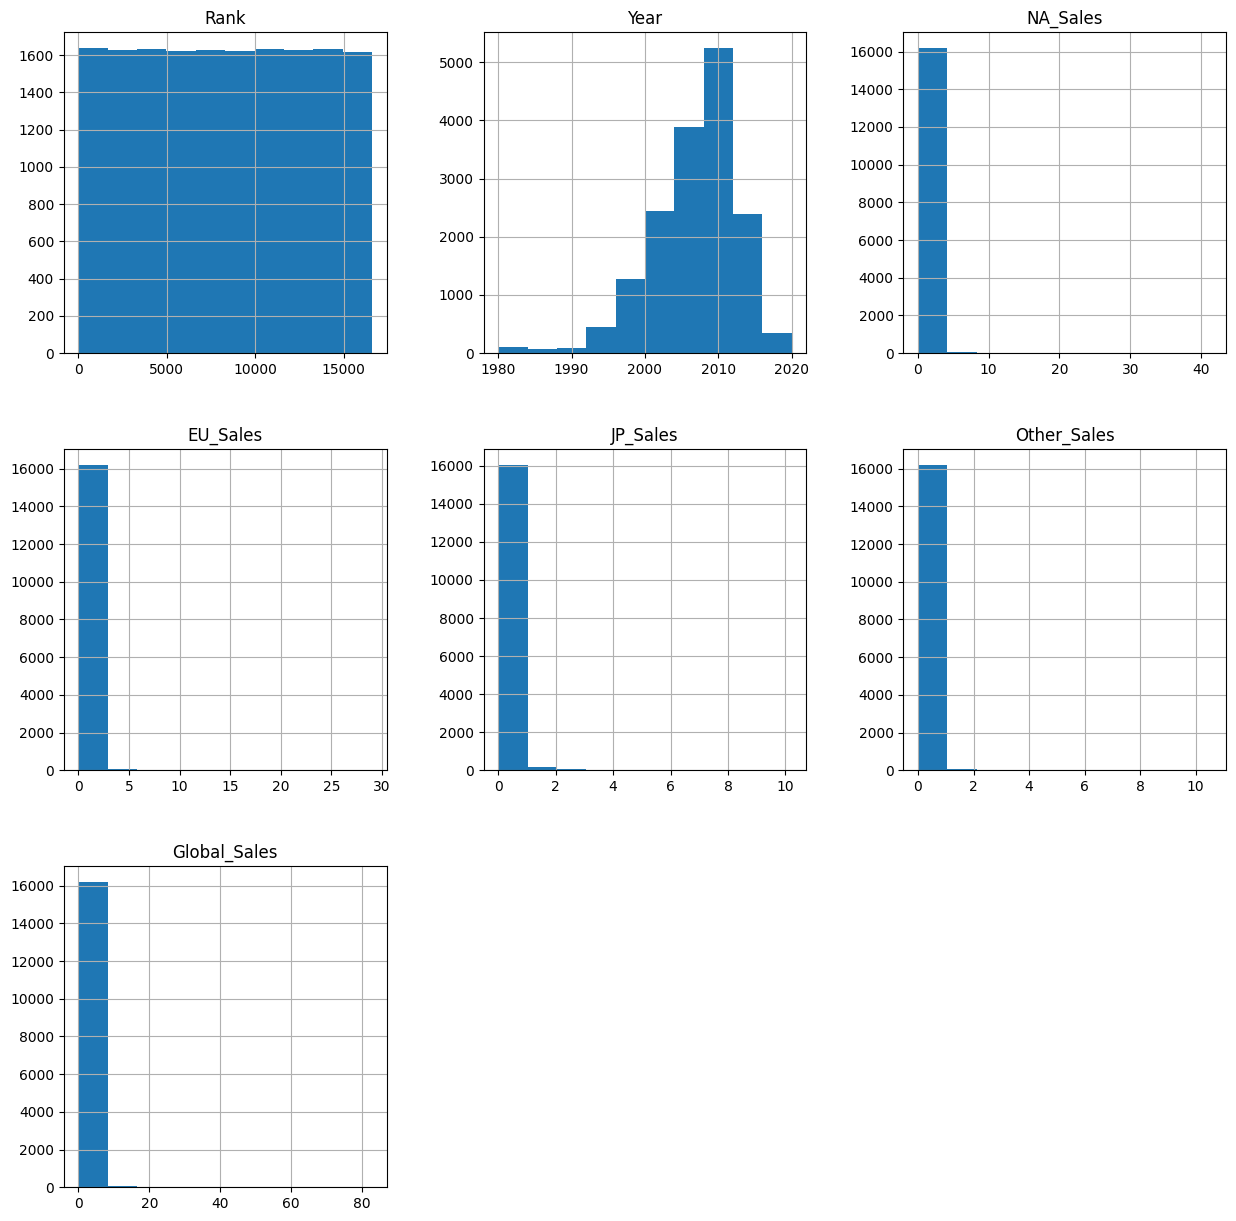

(16291, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [29]:
df.hist(figsize=(15,15))
plt.show()
print(df.shape)
print(df.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

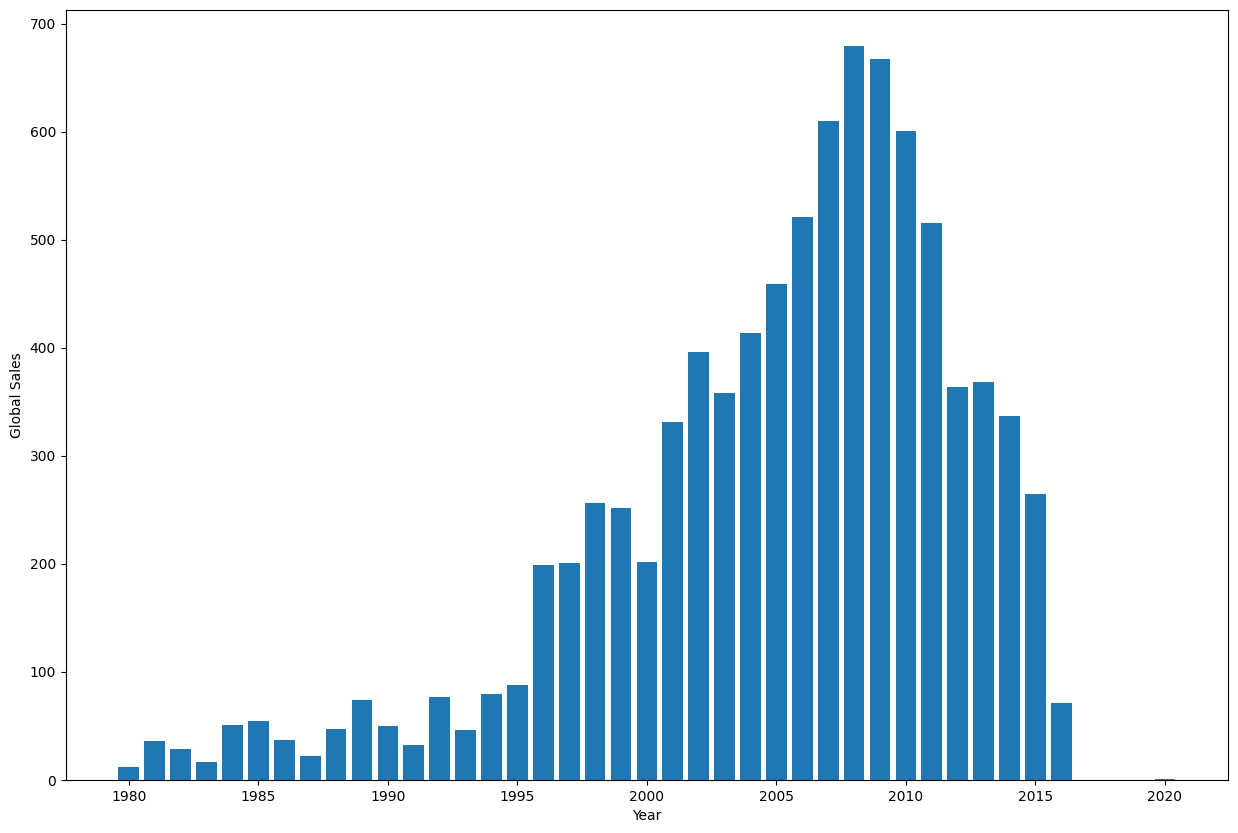

In [31]:
y = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(15,10))
plt.bar(y.index,y)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show
# The sales of video games peaked at 2008-2009

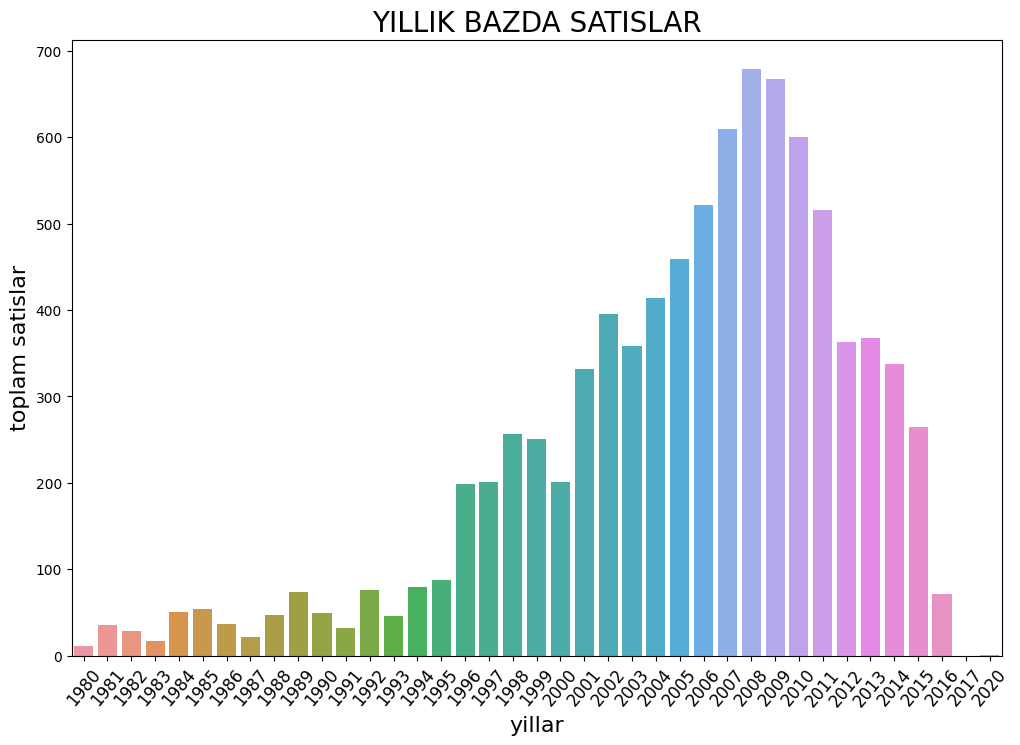

In [35]:
year_total = df.groupby(['Year']).sum()
sum_year_total = year_total['Global_Sales']
#veri setindeki float olan yillarin int donusumu yapiliyor
yil = year_total.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = sum_year_total, x = yil)
ax.set_xlabel(xlabel='yillar', fontsize=16)
ax.set_xticklabels(labels = yil, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='toplam satislar', fontsize=16)
ax.set_title(label='YILLIK BAZDA SATISLAR', fontsize=20)
plt.show();

Thank You